This project details the steps I used to determine the statistical significance of the results of an AB test for a digital marketing company.

In [7]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)
# load dataset
df=pd.read_excel(r'C:\Users\Anton\Documents\Data Analysis\AB Test.xlsx')
df.head()

,group,action
0,experiment,view
1,control,view
2,control,view and click
3,control,view and click
4,control,view


In [10]:
# The data has two columns: 'group' & 'action'
# 'group' shows if the website visitor saw the original (control) or new (experiment) ad 
# 'action' shows the action the visitor took:  'view' or 'view and click'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   group   3757 non-null   object
 1   action  3757 non-null   object
dtypes: object(2)
memory usage: 58.8+ KB


In [12]:
df['group'].value_counts()

experiment    1881
control       1876
Name: group, dtype: int64

In [13]:
df['action'].value_counts()

view              3082
view and click     675
Name: action, dtype: int64

Hypothesis Testing steps: <br>
1) Specify the Null Hypothesis -- Null Hypothesis is old ad is better than new ad <br>
2) Specify the Alternative Hypothesis -- Alt Hypothesis is new ad is better than old ad<br>
3) Set the Significance Level (a) -- Set a significance level of 95% <br>
4) Calculate the Corresponding P-Value. <br>
5) Drawing a Conclusion <br>

In [14]:
# Create dataframe with all observations from control group 
control_df = df.query('group=="control"')

# Compute CTR for control group - # of visitors who saw old ad and "view and click" / total # of visitors who saw old ad
control_ctr = control_df.query('action=="view and click"').index.nunique()/control_df.index.nunique()

print("CTR for Control Group = ", control_ctr)

CTR for Control Group =  0.19349680170575692


In [15]:
# Get dataframe with all observations from experiment group 
exp_df = df.query('group == "experiment"')

# Compute CTR for experiment group - # of visitors who saw new ad and "view and click" / total # of visitors who saw new ad
exp_ctr = exp_df.query('action == "view and click"').index.nunique()/exp_df.index.nunique()

# Display the CTR For the experiment group
print("CTR for Experiment Group =", exp_ctr)

CTR for Experiment Group = 0.16586921850079744


In [17]:
# Compute the difference in the CTR 
diff_ctr = exp_ctr - control_ctr

# Display the difference 
print("Difference in CTR = ", diff_ctr)
# It appears the control group's CTR is higher - but can we generalize this for the whole population?

Difference in CTR =  -0.027627583204959477


We can use bootstrapping to determine statistical significance. We can create 10,000 bootstrapped datasets, then create of a histogram of the means of those datasets. 


In [18]:
# Creating our bootsrapped datasets
differences = []
size = df.shape[0]
for I in range(10000): #We will create 10,000 bootstrapped datasets
    sample = df.sample(size, replace=True)
    control_df = sample.query('group == "control"')
    exp_df = sample.query('group == "experiment"')
    control_ctr = control_df.query('action == "view and click"').index.nunique()/control_df.index.nunique()
    exp_ctr = exp_df.query('action == "view and click"').index.nunique()/exp_df.index.nunique()
    differences.append(exp_ctr - control_ctr)

(array([  22.,  140.,  664., 1721., 2755., 2632., 1465.,  503.,   89.,
           9.]),
 array([-0.06209659, -0.05504038, -0.04798418, -0.04092797, -0.03387176,
        -0.02681555, -0.01975934, -0.01270314, -0.00564693,  0.00140928,
         0.00846549]),
 <BarContainer object of 10 artists>)

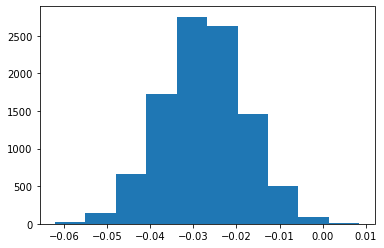

In [19]:
# Plot the sampling distribution 
differences = np.array(differences)
plt.hist(differences)
# We see that the histogram is normally distributed

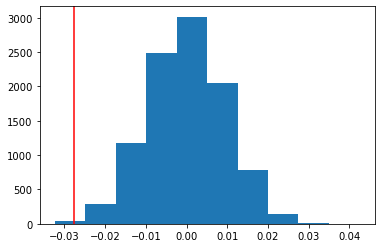

In [20]:
# Simulate the distribution under the null hypothesis 
null_hypothesis = np.random.normal(0,differences.std(),differences.size)


# Plot the null distribution 
plt.hist(null_hypothesis)
plt.axvline(diff_ctr,c='red') #Plotting the observed statistic (calculated diff in Exp vs Control CTR)

# We see that the null hypothesis is larger than the statistic most of the time
# Seems very likely that we will fail to reject the null hypothesis
# As the null hypothesis is more than the observed statistic most of the time

In [24]:
# Compute the P-value 
print( "P-value: ", (null_hypothesis > diff_ctr).mean())

P-value:  0.9986


Final Takeaways: <br>
We see P values is greater than .05 - therefore we fail to reject the null hypothesis <br>
We accepted the null hypothesis, which states that the old ad is better than the new ad. <br>
Therefore I did not recommend moving forward with this data set.